# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the beacon transmitting beacon in the map $m$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

In [25]:
import numpy as np
def normal_density(x,u,sigma):
    # x: input
    # u: mean
    # sigma: covariance matrix
    # return: probability density

    return np.exp(-0.5*(x-u)**2/sigma**2)/np.sqrt(2*np.pi)/sigma
def landmark_observation_model(z,x,m,sigma_z=0.01):
    # z: observation
    # x: robot pose
    # m: map
    # return: probability of observation
    return normal_density(z,np.linalg.norm(m-x),sigma_z)
    

In [28]:
normal_density(0,0,0.01)

39.89422804014327

In [26]:
print(landmark_observation_model(3,5,2))

39.89422804014327


---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $m_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

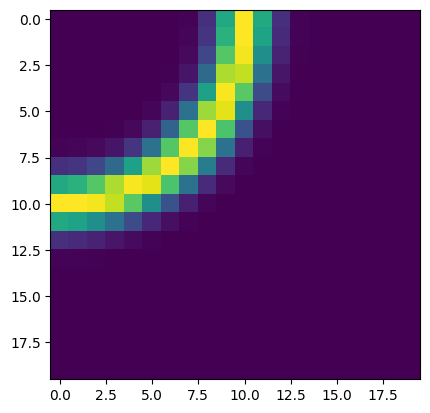

In [31]:
grid_map = np.zeros([20,20])
beacon = np.array([0,0])
import matplotlib.pyplot as plt
for i in range(20):
    for j in range(20):
        grid_map[i,j] = landmark_observation_model(10,np.array([i,j]),beacon,1.0)
grid_map/=np.sum(grid_map)
plt.imshow(grid_map)


---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $m_2 = [0, 10]$
- $m_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

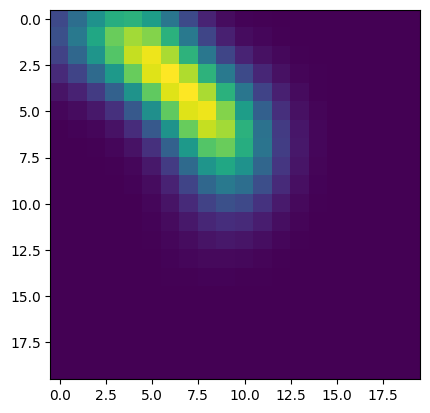

In [33]:
grid_map = np.zeros([20,20])
beacon = np.array([[0,10],[10,0]])
import matplotlib.pyplot as plt
for i in range(20):
    for j in range(20):
        belief1 = landmark_observation_model(5,np.array([i,j]),beacon[0],3.0)
        belief2 = landmark_observation_model(9,np.array([i,j]),beacon[1],2.0)
        grid_map[i,j] = belief1 * belief2
grid_map /= np.sum(grid_map)
plt.imshow(grid_map)